<a href="https://colab.research.google.com/github/lattarian/projeto_aplicado_iv/blob/main/projeto/cd_projeto_aplicado_iv_entrega_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <img src="https://raw.githubusercontent.com/scalabrinig/cdProjetoAplicadoIV/d093146488f56dfcf0ef286bcee8efe0e71b9c76/figuras/mackenzie_logo.jpg" width="25%" align="right"/>

# **PROJETO APLICADO IV - Ciência de Dados EaD - 2025/02**


# **Entrega 2**

---

# **Trabalho decente e mercado de trabalho: análise temporal da taxa de desocupação no Brasil**

---

In [ ]:
#@title **Identificação do Grupo e Opção do Projeto**

#@markdown Integrantes do Grupo, nome completo em ordem alfabética (*informe: \<nome\>, \<matrícula\>*)
Aluno1 = 'Luis Fernando do Lago Attarian, 10089158' #@param {type:"string"}
Aluno2 = 'Kelly Graziely dos Santos Pena, 10416108' #@param {type:"string"}


# **Introdução**

A taxa de desocupação é um dos principais indicadores para compreender a dinâmica do mercado de trabalho e a estabilidade econômica do Brasil. Desde 2012, esse índice tem oscilado em resposta a crises, como a recessão de 2015–2016 e a pandemia de COVID-19, e a períodos de recuperação, como a expansão recente do emprego formal (IBGE, 2024; BRASIL, 2025). Em 2024, a taxa média de 6,6% atingiu o menor nível da série histórica, e em 2025 o índice recuou ainda mais para 5,8%, sinalizando avanços consistentes alinhados ao Objetivo de Desenvolvimento Sustentável 8 (ODS 8), que busca promover trabalho decente e crescimento econômico (NAÇÕES UNIDAS, 2023).

O projeto utiliza como base de dados a Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), realizada pelo IBGE, que disponibiliza a taxa de desocupação com periodicidade trimestral, abrangendo todas as Unidades da Federação e permitindo comparações regionais. Trata-se de uma fonte oficial, padronizada e amplamente utilizada em estudos acadêmicos e formulação de políticas públicas, o que garante confiabilidade e relevância às análises.

O objetivo geral é analisar a evolução da taxa de desocupação no Brasil entre 2012 e 2025 por meio de técnicas de séries temporais, identificando tendências, padrões sazonais e impactos de eventos econômicos. Especificamente, busca-se organizar e explorar os microdados da PNAD Contínua, construir representações gráficas que evidenciem ciclos e rupturas, decompor a série temporal em tendência, sazonalidade e ruído, comparar períodos críticos, avaliar disparidades regionais e relacionar os resultados às metas do ODS 8.

A escolha da taxa de desocupação justifica-se por sua centralidade na dinâmica econômica e social: o desemprego afeta renda, consumo, arrecadação e inclusão social. Ao mesmo tempo, a análise histórica e comparativa permite gerar subsídios para políticas públicas e decisões estratégicas, reforçando a importância de alinhar evidências quantitativas a objetivos sociais mais amplos, como os definidos pela ONU.



# **Referencial Teórico**

A taxa de desocupação mede a porcentagem de pessoas que querem trabalhar, mas não encontram emprego, sendo um dos principais termômetros da economia (IBGE, 2024). Esse índice muda conforme o ritmo de crescimento, crises e políticas públicas. Estudos como os de Barros e Corseuil (2021) e Firpo et al. (2022) mostram que recessões e eventos inesperados, como a pandemia de COVID-19, impactam diretamente o desemprego.
Para entender essas variações ao longo do tempo, utilizam-se séries temporais, que ajudam a ver tendência, sazonalidade e momentos de ruptura. Modelos tradicionais como o ARIMA são bons para prever dados estáveis, mas têm limitações em períodos de grandes mudanças (Carvalho; Moreira, 2020). A técnica de decomposição STL (Seasonal-Trend decomposition using Loess), recomendada por Hyndman e Athanasopoulos (2018), é mais flexível: separa a série em tendência, padrão sazonal e ruído, mesmo quando os ciclos mudam de forma. Modelos de espaço de estado também são uma opção, embora mais complexos (Harvey, 1990).
Pesquisas brasileiras recentes, como as de Silva e Porsse (2021) e Santos e Porsse (2022), reforçam a importância de acompanhar o desemprego com métodos estatísticos e de aprendizado de máquina. Em escala global, a OIT (ILO, 2023) e a ONU, no ODS 8, destacam que monitorar o mercado de trabalho é essencial para políticas de emprego e crescimento sustentável.
 Com base nesses trabalhos, este projeto analisa a taxa de desocupação do Brasil entre 2012 e 2025 usando a decomposição STL, por ser uma abordagem clara e robusta, que facilita a identificação de tendências e a comunicação dos resultados para a sociedade e para gestores públicos.

# **Pipeline da Solução**

1) Coleta (SIDRA/IBGE – PNAD Contínua, t.4099)
Recuperamos a taxa de desocupação para Brasil e UFs via API (2012–2025, frequência trimestral). Mantemos metadados de período (código e rótulo) para rastreabilidade.

2) Padronização temporal e estrutural
Convertemos o código do período (ex.: 201201) em ano, trimestre, periodo (Q-DEC) e data (1º mês do trimestre). Uniformizamos os atributos (local, cod_local, ano, trimestre, periodo, data, valor) e ordenamos as observações por tempo e local. (Opcional: grade trimestral completa, sem imputação.)

3) EDA (analítica e gráfica)
Estatísticas descritivas e visualizações para entender o fenômeno:
• Série temporal do Brasil;
• Boxplot por trimestre (sazonalidade);
• Comparações entre UFs (médias e volatilidade);
• Comparação entre períodos macroeconômicos (pré-crise, crise, pandemia, recuperação).
Essa etapa gera os “achados” iniciais e hipóteses para a modelagem.

4) Decomposição STL (tendência, sazonalidade, resíduo)
Usamos STL (period=4) para separar a série em componentes e obter a série ajustada sazonalmente (valor_aj_sazonal). Entregas: colunas stl_trend, stl_season e valor_aj_sazonal, que permitem comparar níveis sem viés sazonal e quantificar a amplitude da sazonalidade.

5) Diagnóstico ACF/PACF
Aplicamos ACF/PACF na série ajustada (e, se necessário, nas versões diferenciadas Δ1/Δ4) para avaliar memória temporal e sinais sazonais residuais. Esse diagnóstico orienta ordens candidatas de modelos AR/MA/SAR e fundamenta comparações robustas entre períodos e regiões.

Resultado esperado desta etapa: um notebook com dados padronizados, painéis EDA, componentes STL e gráficos/tabelas ACF/PACF, prontos para alimentar a análise final e futuras projeções exploratórias, alinhadas ao ODS 8.

## **Visão geral**

[ Coleta ] → [ Padronização ] → [ EDA ] → [ Decomposição STL ] → [ Diagnóstico ACF/PACF ] → [ Comparações (períodos) ] → [ Síntese dos Achados ]



## **Coleta e organização**

## Setup e coleta (SIDRA/IBGE – Tabela 4099)

In [9]:
import requests
import pandas as pd

# URLs (tabela 4099, variável 4099 = taxa de desocupação)
# n1/all = Brasil; n3/all = UFs
URL_BRASIL = "https://apisidra.ibge.gov.br/values/t/4099/n1/all/v/4099/p/all?formato=json"
URL_UF     = "https://apisidra.ibge.gov.br/values/t/4099/n3/all/v/4099/p/all?formato=json"

HEADERS = {"Accept": "application/json"}

def load_sidra_json(url: str) -> pd.DataFrame:
    r = requests.get(url, headers=HEADERS, timeout=60)
    r.raise_for_status()
    data = r.json()
    return pd.DataFrame(data)

# Carregar datasets
df_brasil_raw = load_sidra_json(URL_BRASIL)
df_uf_raw = load_sidra_json(URL_UF)

print("Brasil (raw) — amostra:")
display(df_brasil_raw.head())
print(df_brasil_raw.dtypes)
print("\nUFs (raw) — amostra:")
display(df_uf_raw.head())
print(df_uf_raw.dtypes)

Brasil (raw) — amostra:


,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Variável (Código),Variável,Trimestre (Código),Trimestre
1,1,Brasil,2,%,8.0,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201201,1º trimestre 2012
2,1,Brasil,2,%,7.6,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201202,2º trimestre 2012
3,1,Brasil,2,%,7.1,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201203,3º trimestre 2012
4,1,Brasil,2,%,6.9,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201204,4º trimestre 2012


NC     object
NN     object
MC     object
MN     object
V      object
D1C    object
D1N    object
D2C    object
D2N    object
D3C    object
D3N    object
dtype: object

UFs (raw) — amostra:


,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Unidade da Federação (Código),Unidade da Federação,Variável (Código),Variável,Trimestre (Código),Trimestre
1,3,Unidade da Federação,2,%,8.1,11,Rondônia,4099,"Taxa de desocupação, na semana de referência, ...",201201,1º trimestre 2012
2,3,Unidade da Federação,2,%,6.3,11,Rondônia,4099,"Taxa de desocupação, na semana de referência, ...",201202,2º trimestre 2012
3,3,Unidade da Federação,2,%,5.9,11,Rondônia,4099,"Taxa de desocupação, na semana de referência, ...",201203,3º trimestre 2012
4,3,Unidade da Federação,2,%,5.2,11,Rondônia,4099,"Taxa de desocupação, na semana de referência, ...",201204,4º trimestre 2012


NC     object
NN     object
MC     object
MN     object
V      object
D1C    object
D1N    object
D2C    object
D2N    object
D3C    object
D3N    object
dtype: object


## Descrição inicial (atributos e observações)

In [3]:
# Descrição Brasil
print("=== Brasil (Tabela 4099) ===")
print("Número de observações (linhas):", len(df_brasil_raw))
print("Atributos (colunas):", list(df_brasil_raw.columns))
print("\nTipos de dados:")
print(df_brasil_raw.dtypes)

# Descrição UFs
print("\n=== UFs (Tabela 4099) ===")
print("Número de observações (linhas):", len(df_uf_raw))
print("Atributos (colunas):", list(df_uf_raw.columns))
print("\nTipos de dados:")
print(df_uf_raw.dtypes)

descricao_colunas = {
    "NC": "Nível de cobertura dos dados (geralmente não usado diretamente).",
    "D1C": "Código da 1ª dimensão (ex.: Brasil=1 ou código da UF).",
    "D1N": "Nome da 1ª dimensão (ex.: Brasil, São Paulo).",
    "D2C": "Código da 2ª dimensão (período).",
    "D2N": "Nome do período (ex.: 2012 1º trimestre, 2025 2º trimestre).",
    "V":   "Valor da variável selecionada (neste caso, taxa de desocupação em %)."
}

print("\n=== Dicionário de colunas (presentes nos DataFrames) ===")
for col, desc in descricao_colunas.items():
    if col in df_brasil_raw.columns or col in df_uf_raw.columns:
        print(f"{col}: {desc}")

=== Brasil (Tabela 4099) ===
Número de observações (linhas): 55
Atributos (colunas): ['NC', 'NN', 'MC', 'MN', 'V', 'D1C', 'D1N', 'D2C', 'D2N', 'D3C', 'D3N']

Tipos de dados:
NC     object
NN     object
MC     object
MN     object
V      object
D1C    object
D1N    object
D2C    object
D2N    object
D3C    object
D3N    object
dtype: object

=== UFs (Tabela 4099) ===
Número de observações (linhas): 1459
Atributos (colunas): ['NC', 'NN', 'MC', 'MN', 'V', 'D1C', 'D1N', 'D2C', 'D2N', 'D3C', 'D3N']

Tipos de dados:
NC     object
NN     object
MC     object
MN     object
V      object
D1C    object
D1N    object
D2C    object
D2N    object
D3C    object
D3N    object
dtype: object

=== Dicionário de colunas (presentes nos DataFrames) ===
NC: Nível de cobertura dos dados (geralmente não usado diretamente).
D1C: Código da 1ª dimensão (ex.: Brasil=1 ou código da UF).
D1N: Nome da 1ª dimensão (ex.: Brasil, São Paulo).
D2C: Código da 2ª dimensão (período).
D2N: Nome do período (ex.: 2012 1º trime

# Padronização

## Limpeza e padronização (funções auxiliares)

In [30]:
import re

def parse_periodo_from_cod(cod):
    """
    Recebe cod_periodo no padrão SIDRA (p.ex. '201201' = 1º tri/2012).
    Retorna (ano, trimestre, Period('YYYYQn','Q-DEC'), data_timestamp).
    - Se vier mensal (01..12), mapeia mês -> trimestre.
    - Retorna None se não conseguir interpretar.
    """
    if pd.isna(cod):
        return None
    s = str(cod).strip()
    s = "".join(re.findall(r"\d+", s))  # só dígitos

    if len(s) < 5:
        return None

    ano = int(s[:4])
    resto = s[4:]  # '01'..'04' (trimestre) ou '01'..'12' (mês)

    # Interpretação do resto
    try:
        x = int(resto)
    except ValueError:
        return None

    if 1 <= x <= 4:
        tri = x
    elif 1 <= x <= 12:
        tri = (x - 1) // 3 + 1  # mês -> trimestre
    else:
        return None

    periodo = pd.Period(f"{ano}Q{tri}", freq="Q-DEC")
    start_month = {1: 1, 2: 4, 3: 7, 4: 10}[tri]
    data_ts = pd.Timestamp(year=ano, month=start_month, day=1)
    return ano, tri, periodo, data_ts

def coerce_valor(v):
    if pd.isna(v):
        return pd.NA
    # Garantir float (SIDRA costuma vir com ponto; mas tratamos vírgula se aparecer)
    return float(str(v).replace(",", "."))

## Transformar Brasil (tidy: atributos/observações)

In [23]:
# Manter apenas as colunas relevantes
cols_keep = ["D1C", "D1N", "D3C", "D3N", "V"]
df_brasil = df_brasil_raw.loc[:, [c for c in cols_keep if c in df_brasil_raw.columns]].copy()

# 1) Remover a linha de cabeçalho do SIDRA (onde V == "Valor")
if "V" in df_brasil.columns:
    df_brasil = df_brasil[df_brasil["V"] != "Valor"].copy()

# 2) Renomear para padrão
df_brasil = df_brasil.rename(columns={
    "D1C": "cod_local",
    "D1N": "local",
    "D3C": "cod_periodo",
    "D3N": "periodo_nome",
    "V":   "valor"
})

# 3) Converter 'valor' para float (coerção segura)
df_brasil["valor"] = (
    df_brasil["valor"]
    .astype(str).str.strip().str.replace(",", ".", regex=False)
)
df_brasil["valor"] = pd.to_numeric(df_brasil["valor"], errors="coerce")

# 4) Extrair ano, trimestre, Period e data
parsed = df_brasil["cod_periodo"].apply(parse_periodo_from_cod)
df_brasil["ano"] = parsed.apply(lambda x: x[0])
df_brasil["trimestre"] = parsed.apply(lambda x: x[1])
df_brasil["periodo"] = parsed.apply(lambda x: x[2])
df_brasil["data"] = parsed.apply(lambda x: x[3])

# 5) Ordenar e tipar
df_brasil = (
    df_brasil.dropna(subset=["periodo"])
             .sort_values(["ano", "trimestre"])
             .reset_index(drop=True)
)

print("Brasil (tidy) — amostra:")
display(df_brasil.head())
print(df_brasil.dtypes)

Brasil (tidy) — amostra:


,cod_local,local,cod_periodo,periodo_nome,valor,ano,trimestre,periodo,data
0,1,Brasil,201201,1º trimestre 2012,8.0,2012,1,2012Q1,2012-01-01
1,1,Brasil,201202,2º trimestre 2012,7.6,2012,2,2012Q2,2012-04-01
2,1,Brasil,201203,3º trimestre 2012,7.1,2012,3,2012Q3,2012-07-01
3,1,Brasil,201204,4º trimestre 2012,6.9,2012,4,2012Q4,2012-10-01
4,1,Brasil,201301,1º trimestre 2013,8.0,2013,1,2013Q1,2013-01-01


cod_local               object
local                   object
cod_periodo             object
periodo_nome            object
valor                  float64
ano                      int64
trimestre                int64
periodo          period[Q-DEC]
data            datetime64[ns]
dtype: object


## Transformar UFs (tidy, com uf_sigla quando disponível no nome)

In [29]:
df_uf = df_uf_raw.loc[:, [c for c in cols_keep if c in df_uf_raw.columns]].copy()
df_uf = df_uf.rename(columns={
    "D1C": "cod_local",
    "D1N": "local",
    "D3C": "cod_periodo",
    "D3N": "periodo_nome",
    "V":   "valor"
})

# 1) Remover a linha de cabeçalho do SIDRA (onde V == "Valor")
if "V" in df_uf.columns:
    df_uf = df_uf[df_uf["V"] != "Valor"].copy()

# 3) Converter 'valor' para float (coerção segura)
df_uf["valor"] = (
    df_uf["valor"]
    .astype(str).str.strip().str.replace(",", ".", regex=False)
)
df_uf["valor"] = pd.to_numeric(df_uf["valor"], errors="coerce")

def _safe_parse(cod):
    out = parse_periodo_from_cod(cod)

    return out if isinstance(out, tuple) else (pd.NA, pd.NA, pd.NaT, pd.NaT)

# Extração de ano/trimestre/period/data
parsed_uf = df_uf["cod_periodo"].apply(_safe_parse)

df_uf["ano"] = parsed_uf.apply(lambda x: x[0])
df_uf["trimestre"] = parsed_uf.apply(lambda x: x[1])
df_uf["periodo"] = parsed_uf.apply(lambda x: x[2])
df_uf["data"] = parsed_uf.apply(lambda x: x[3])


df_uf = df_uf.dropna(subset=["periodo"]).sort_values(["local","ano","trimestre"]).reset_index(drop=True)

print("UFs (tidy) — amostra:")
display(df_uf.head(10))
print(df_uf.dtypes)

UFs (tidy) — amostra:


,cod_local,local,cod_periodo,periodo_nome,valor,ano,trimestre,periodo,data
0,12,Acre,201201,1º trimestre 2012,9.2,2012,1,2012Q1,2012-01-01
1,12,Acre,201202,2º trimestre 2012,9.0,2012,2,2012Q2,2012-04-01
2,12,Acre,201203,3º trimestre 2012,7.7,2012,3,2012Q3,2012-07-01
3,12,Acre,201204,4º trimestre 2012,8.2,2012,4,2012Q4,2012-10-01
4,12,Acre,201301,1º trimestre 2013,10.9,2013,1,2013Q1,2013-01-01
5,12,Acre,201302,2º trimestre 2013,9.5,2013,2,2013Q2,2013-04-01
6,12,Acre,201303,3º trimestre 2013,8.9,2013,3,2013Q3,2013-07-01
7,12,Acre,201304,4º trimestre 2013,7.0,2013,4,2013Q4,2013-10-01
8,12,Acre,201401,1º trimestre 2014,8.1,2014,1,2014Q1,2014-01-01
9,12,Acre,201402,2º trimestre 2014,9.7,2014,2,2014Q2,2014-04-01


cod_local               object
local                   object
cod_periodo             object
periodo_nome            object
valor                  float64
ano                     object
trimestre               object
periodo          period[Q-DEC]
data            datetime64[ns]
dtype: object


## Análise Exploratória de Dados (analítica e gráfica)

In [55]:
# EDA — (0) Seleção das bases e garantias de tipo (sem DeprecationWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Usa versões com qualidade (qc) se existirem; caso contrário, usa as padronizadas
dfB = globals().get("df_brasil")
dfU = globals().get("df_uf")

if dfB is None or dfU is None:
    raise NameError("Não encontrei df_brasil/df_uf Execute as etapas anteriores.")


print("Bases prontas para EDA:", dfB.shape, dfU.shape)

Bases prontas para EDA: (54, 18) (1458, 9)


**Estatísticas descritivas — Brasil**

In [35]:
# EDA — (1) Estatísticas descritivas — Brasil
print("=== EDA — Brasil (estatísticas descritivas) ===")
display(dfB[["valor"]].describe())

=== EDA — Brasil (estatísticas descritivas) ===


,valor
count,54.000000
mean,9.862963
std,2.742282
min,5.800000
25%,7.425000
50%,9.050000
75%,12.100000
max,14.900000


**Estatísticas por trimestre — Brasil (sazonalidade)**

In [36]:
# EDA — (2) Estatísticas por trimestre — Brasil
if "trimestre" in dfB.columns:
    saz_brasil = (dfB.groupby("trimestre")["valor"]
                    .agg(["count","mean","std","min","max"])
                    .rename_axis("trimestre")
                    .reset_index())
    print("Brasil — estatísticas por trimestre:")
    display(saz_brasil)
else:
    print("Coluna 'trimestre' ausente em dfB.")

Brasil — estatísticas por trimestre:


,trimestre,count,mean,std,min,max
0,1,14,10.300000,2.755414,7.0,14.9
1,2,14,9.814286,2.892658,5.8,14.2
2,3,13,9.892308,2.846185,6.4,14.9
3,4,13,9.415385,2.716568,6.2,14.2


**Série temporal — Brasil (linha + média móvel 4T)**

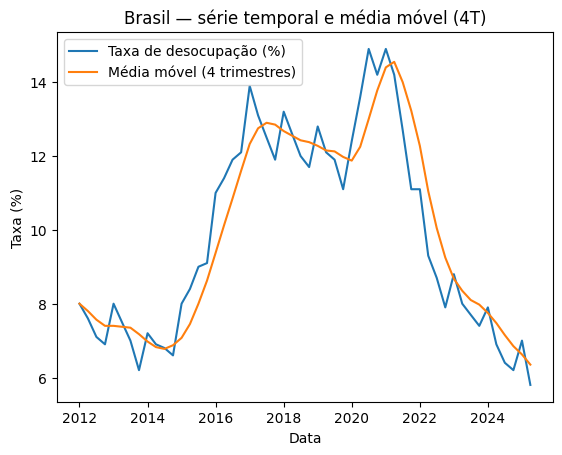

In [37]:
# EDA — (3) Série temporal — Brasil (linha + média móvel 4T)
dfB_ord = dfB.sort_values("data").copy()
dfB_ord["mm_4tr"] = dfB_ord["valor"].rolling(4, min_periods=1).mean()

plt.figure()
plt.plot(dfB_ord["data"], dfB_ord["valor"], label="Taxa de desocupação (%)")
plt.plot(dfB_ord["data"], dfB_ord["mm_4tr"], label="Média móvel (4 trimestres)")
plt.title("Brasil — série temporal e média móvel (4T)")
plt.xlabel("Data"); plt.ylabel("Taxa (%)"); plt.legend(); plt.show()

**Sazonalidade — Boxplot por trimestre (Brasil)**

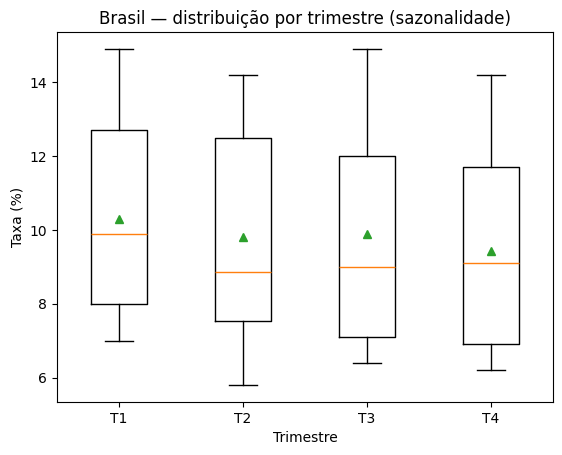

In [40]:
if "trimestre" in dfB.columns:
    ordem = [1, 2, 3, 4]
    # Só usa trimestres que existem e têm dados
    trimestres_presentes = [t for t in ordem if (dfB["trimestre"] == t).any()]
    dados_box = [dfB.loc[dfB["trimestre"] == t, "valor"].dropna().values for t in trimestres_presentes]
    # Evita erro se algum trimestre vier vazio
    dados_box = [arr for arr in dados_box if arr.size > 0]
    if len(dados_box) == 0:
        print("Sem dados suficientes para boxplot por trimestre.")
    else:
        plt.figure()
        plt.boxplot(dados_box, tick_labels=[f"T{t}" for t in trimestres_presentes], showmeans=True)
        plt.title("Brasil — distribuição por trimestre (sazonalidade)")
        plt.xlabel("Trimestre"); plt.ylabel("Taxa (%)"); plt.show()
else:
    print("Coluna 'trimestre' ausente em dfB.")

**UFs — estatísticas agregadas (média, mediana, desvio, n)**

In [41]:
# EDA — (6) UFs — estatísticas agregadas
uf_stats = (dfU.groupby("local")["valor"]
              .agg(media="mean", mediana="median", desvio="std", n="count")
              .reset_index()
              .dropna(subset=["media"]))
print("UFs — estatísticas agregadas (amostra):")
display(uf_stats.head())

UFs — estatísticas agregadas (amostra):


,local,media,mediana,desvio,n
0,Acre,11.053704,9.90,3.301727,54
1,Alagoas,13.122222,11.80,3.708006,54
2,Amapá,13.931481,14.15,3.651819,54
3,Amazonas,11.748148,10.50,3.096239,54
4,Bahia,14.631481,14.70,3.516528,54


**UFs — Top 10 maiores médias (gráfico)**

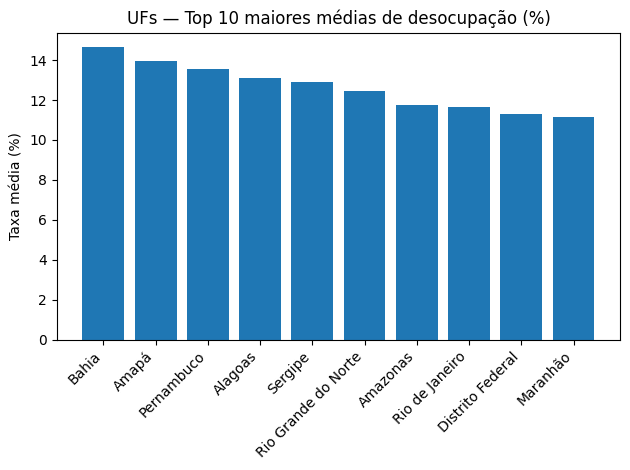

In [42]:
top10_media = uf_stats.sort_values("media", ascending=False).head(10)
plt.figure()
plt.bar(top10_media["local"], top10_media["media"])
plt.title("UFs — Top 10 maiores médias de desocupação (%)")
plt.xticks(rotation=45, ha="right"); plt.ylabel("Taxa média (%)"); plt.tight_layout(); plt.show()

**UFs — Top 10 maior volatilidade (desvio-padrão)**

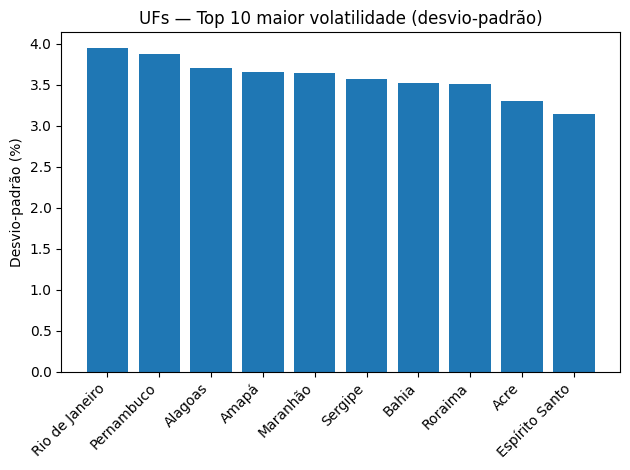

In [43]:
top10_vol = uf_stats.sort_values("desvio", ascending=False).head(10)
plt.figure()
plt.bar(top10_vol["local"], top10_vol["desvio"])
plt.title("UFs — Top 10 maior volatilidade (desvio-padrão)")
plt.xticks(rotation=45, ha="right"); plt.ylabel("Desvio-padrão (%)"); plt.tight_layout(); plt.show()

**Série temporal de top 5 estados com maiores médias**

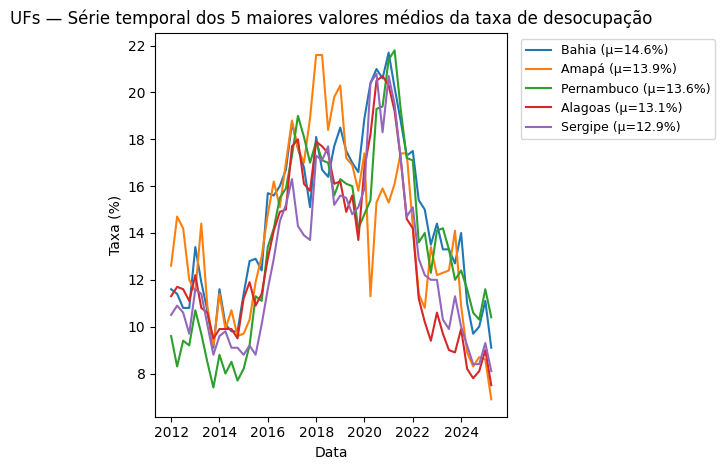

,media_%
local,
Bahia,14.63
Amapá,13.93
Pernambuco,13.56
Alagoas,13.12
Sergipe,12.88


In [47]:
# Calcula médias por UF e seleciona top-5
uf_means = (dfU.groupby("local", as_index=False)["valor"]
              .mean()
              .dropna(subset=["valor"])
              .rename(columns={"valor": "media"}))

top5_locs = (uf_means.sort_values("media", ascending=False)
                        .head(5)["local"].tolist())

# Ordena as UFs selecionadas pela média (desc) para plotar em ordem consistente
ordem_top5 = (uf_means.set_index("local")
                        .loc[top5_locs, "media"]
                        .sort_values(ascending=False))

# Filtra dados das UFs top-5 e ordena por tempo
gdf = (dfU[dfU["local"].isin(ordem_top5.index)]
       .dropna(subset=["valor", "data"])
       .sort_values("data"))

plt.figure()
for uf in ordem_top5.index:
    s = gdf[gdf["local"] == uf]
    if s.empty:
        continue
    plt.plot(s["data"], s["valor"], label=f"{uf} (μ={s['valor'].mean():.1f}%)")

plt.title("UFs — Série temporal dos 5 maiores valores médios da taxa de desocupação")
plt.xlabel("Data")
plt.ylabel("Taxa (%)")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=9)  # legenda fora para não poluir
plt.tight_layout()
plt.show()

# Tabela auxiliar das top-5 médias (para referência)
display(ordem_top5.rename("media_%").round(2).to_frame())

**Comparação entre períodos — Brasil (pré-crise, crise, pandemia, recuperação)**

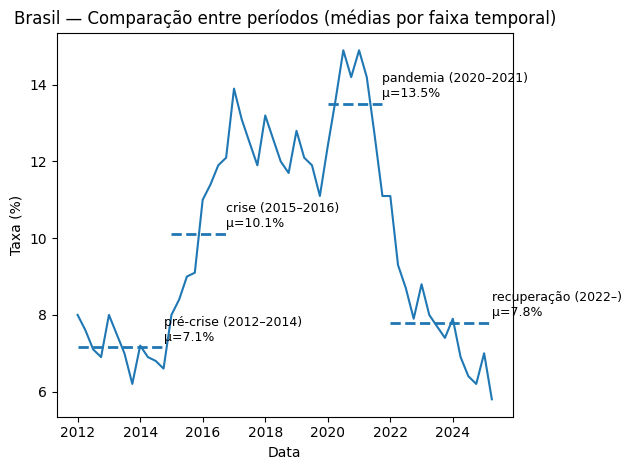

In [56]:
# ===============================
# Gráfico temporal — Comparação entre períodos (Brasil)
# Pré-crise, Crise, Pandemia, Recuperação
# ===============================
import pandas as pd
import matplotlib.pyplot as plt

# Usa a base com qualidade, se existir; senão, a padronizada
dfB = globals().get("df_brasil")
if dfB is None:
    raise NameError("Não encontrei df_brasil. Execute as etapas anteriores.")

# Garantias mínimas
dfB = dfB.copy()
dfB["data"]  = pd.to_datetime(dfB["data"], errors="coerce")
dfB["valor"] = pd.to_numeric(dfB["valor"], errors="coerce")

# Garante 'periodo' como Period (Q-DEC)
if "periodo" not in dfB.columns:
    raise KeyError("Coluna 'periodo' ausente em dfB. Garanta a padronização temporal previamente.")
if not isinstance(getattr(dfB["periodo"], "dtype", None), pd.PeriodDtype):
    dfB["periodo"] = pd.PeriodIndex(dfB["periodo"].astype(str), freq="Q-DEC")

# Define períodos
def _p(y, q):  # Period trimestral
    return pd.Period(f"{y}Q{q}", freq="Q-DEC")

pmax = dfB["periodo"].max()
periodos = {
    "pré-crise (2012–2014)": (_p(2012,1), _p(2014,4)),
    "crise (2015–2016)":     (_p(2015,1), _p(2016,4)),
    "pandemia (2020–2021)":  (_p(2020,1), _p(2021,4)),
    "recuperação (2022–)":   (_p(2022,1), pmax),
}

# Série temporal
dfB_ord = dfB.sort_values("data")

plt.figure()
plt.plot(dfB_ord["data"], dfB_ord["valor"], label="Brasil — taxa de desocupação (%)")
plt.title("Brasil — Comparação entre períodos (médias por faixa temporal)")
plt.xlabel("Data"); plt.ylabel("Taxa (%)")

# Linhas horizontais de média por período, com rótulos
for nome, (ini, fim) in periodos.items():
    mask = (dfB_ord["periodo"] >= ini) & (dfB_ord["periodo"] <= fim)
    sub = dfB_ord.loc[mask, ["data", "valor"]].dropna()
    if sub.empty:
        continue
    ymean = sub["valor"].mean()
    x0, x1 = sub["data"].min(), sub["data"].max()

    # Segmento horizontal da média do período
    plt.hlines(ymean, xmin=x0, xmax=x1, linestyles="--", linewidth=2)

    yoff = (dfB_ord["valor"].max() - dfB_ord["valor"].min()) * 0.01
    plt.text(x1, ymean + yoff, f"{nome}\nμ={ymean:.1f}%", va="bottom", ha="left", fontsize=9)

plt.tight_layout()
plt.show()

## Seasonal-Trend decomposition using Loess

**Brasil — Decomposição STL + série ajustada sazonalmente**

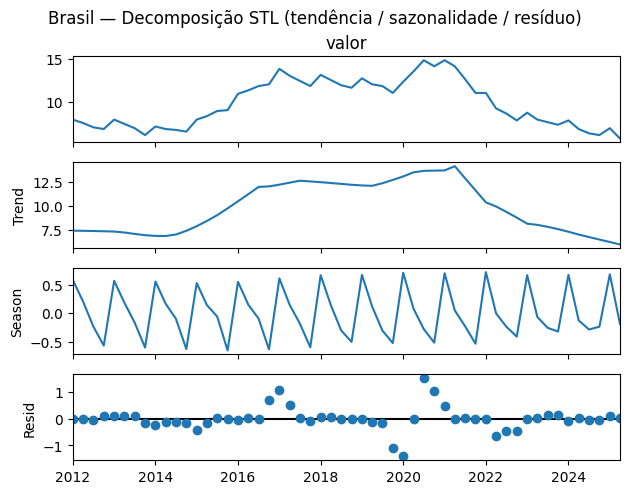

Componentes STL gravados em df_brasil: ['stl_trend', 'stl_season', 'valor_aj_sazonal']


,cod_local,local,cod_periodo,periodo_nome,valor,ano,trimestre,periodo,data,stl_trend_x,stl_season_x,valor_aj_sazonal_x,stl_trend_y,stl_season_y,valor_aj_sazonal_y,stl_trend,stl_season,valor_aj_sazonal
49,1,Brasil,202402,2º trimestre 2024,6.9,2024,2,2024Q2,2024-04-01,7.017702,-0.123951,7.023951,7.017702,-0.123951,7.023951,7.017702,-0.123951,7.023951
50,1,Brasil,202403,3º trimestre 2024,6.4,2024,3,2024Q3,2024-07-01,6.754864,-0.282389,6.682389,6.754864,-0.282389,6.682389,6.754864,-0.282389,6.682389
51,1,Brasil,202404,4º trimestre 2024,6.2,2024,4,2024Q4,2024-10-01,6.493413,-0.232571,6.432571,6.493413,-0.232571,6.432571,6.493413,-0.232571,6.432571
52,1,Brasil,202501,1º trimestre 2025,7.0,2025,1,2025Q1,2025-01-01,6.235080,0.684087,6.315913,6.235080,0.684087,6.315913,6.235080,0.684087,6.315913
53,1,Brasil,202502,2º trimestre 2025,5.8,2025,2,2025Q2,2025-04-01,5.981135,-0.184692,5.984692,5.981135,-0.184692,5.984692,5.981135,-0.184692,5.984692


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

dfB = globals().get("df_brasil_qc", globals().get("df_brasil"))
dfU = globals().get("df_uf_qc",     globals().get("df_uf"))

if dfB is None:
    raise NameError("Não encontrei df_brasil/df_brasil_qc. Execute as etapas anteriores.")


dfB = dfB.copy()
dfB["data"]  = pd.to_datetime(dfB.get("data", pd.NaT), errors="coerce")
dfB["valor"] = pd.to_numeric(dfB["valor"], errors="coerce")

SEASONAL_PERIOD = 4  # trimestral

# STL — (2) Brasil — Decomposição e ajuste sazonal
# Seleciona a série do Brasil (se 'local' existir)
if "local" in dfB.columns:
    sB = (dfB[dfB["local"].str.contains("Brasil", case=False, na=False)]
            .sort_values("data")
            .set_index("data")["valor"])
    if sB.empty:
        sB = dfB.sort_values("data").set_index("data")["valor"]
else:
    sB = dfB.sort_values("data").set_index("data")["valor"]

# Garante frequência regular trimestral para o input do STL
sB = sB.asfreq("QS")  # início de trimestre

sB_input = sB.interpolate(limit_direction="both")

stl = STL(sB_input, period=SEASONAL_PERIOD, robust=True)
res = stl.fit()

# Componentes
trend = pd.Series(res.trend, index=sB.index, name="stl_trend")
season = pd.Series(res.seasonal, index=sB.index, name="stl_season")
resid = pd.Series(res.resid, index=sB.index, name="stl_resid")

# Série ajustada sazonalmente: original - componente sazonal
s_aj = (sB - season).rename("valor_aj_sazonal")

# Plota decomposição (1 figura própria)
fig = res.plot()
fig.suptitle("Brasil — Decomposição STL (tendência / sazonalidade / resíduo)", y=1.02)
plt.show()


target_name =  "df_brasil"
_target = globals().get(target_name).copy()

_target["data"] = pd.to_datetime(_target["data"], errors="coerce")
_target = _target.sort_values("data")

# Merge por data
_target = (_target.merge(trend.rename("stl_trend"), left_on="data", right_index=True, how="left")
                  .merge(season.rename("stl_season"), left_on="data", right_index=True, how="left")
                  .merge(s_aj, left_on="data", right_index=True, how="left"))

globals()[target_name] = _target  # atualiza no ambiente

print(f"Componentes STL gravados em {target_name}: ['stl_trend', 'stl_season', 'valor_aj_sazonal']")
display(_target.tail())

**Gráfico — Brasil: original × ajustado sazonalmente**

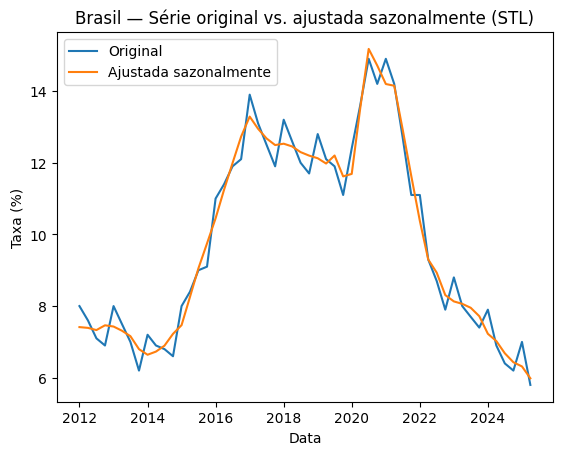

In [60]:
# STL — (4) Gráfico — Brasil: original vs. ajustado sazonalmente
dfB_plot = globals().get("df_brasil").copy()
dfB_plot["data"] = pd.to_datetime(dfB_plot["data"], errors="coerce")
dfB_plot = dfB_plot.sort_values("data")

plt.figure()
plt.plot(dfB_plot["data"], dfB_plot["valor"], label="Original")
if "valor_aj_sazonal" in dfB_plot.columns:
    plt.plot(dfB_plot["data"], dfB_plot["valor_aj_sazonal"], label="Ajustada sazonalmente")
plt.title("Brasil — Série original vs. ajustada sazonalmente (STL)")
plt.xlabel("Data"); plt.ylabel("Taxa (%)"); plt.legend(); plt.show()

**Gráfico — componente sazonal do Brasil**

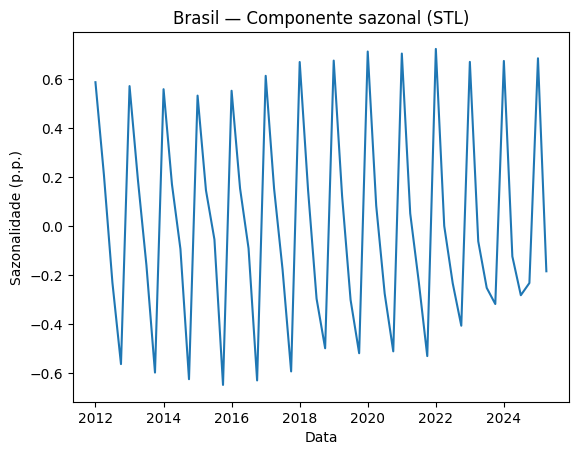

In [63]:
dfB_comp = globals().get("df_brasil").copy()
dfB_comp["data"] = pd.to_datetime(dfB_comp["data"], errors="coerce")
dfB_comp = dfB_comp.sort_values("data")
plt.figure()
plt.plot(dfB_comp["data"], dfB_comp["stl_season"])
plt.title("Brasil — Componente sazonal (STL)")
plt.xlabel("Data"); plt.ylabel("Sazonalidade (p.p.)"); plt.show()


# ACF e PACF

**ACF e PACF — série original e ajustada sazonalmente**

<Figure size 640x480 with 0 Axes>

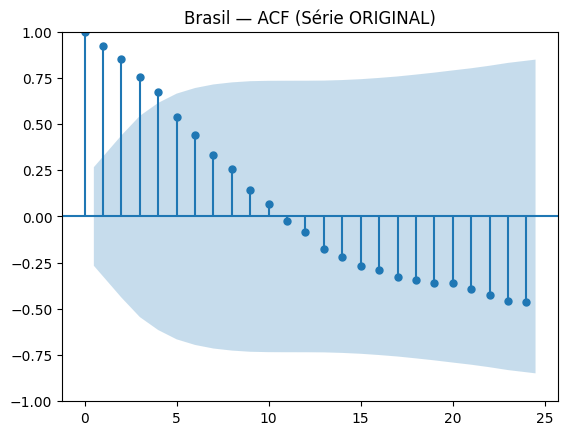

<Figure size 640x480 with 0 Axes>

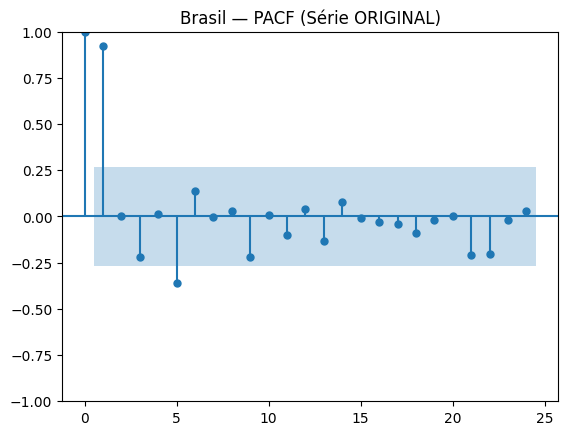

<Figure size 640x480 with 0 Axes>

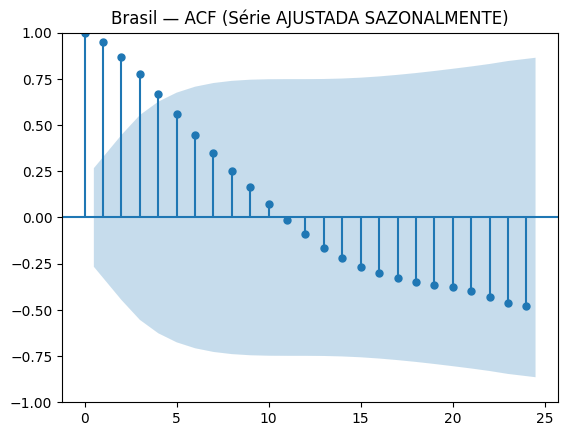

<Figure size 640x480 with 0 Axes>

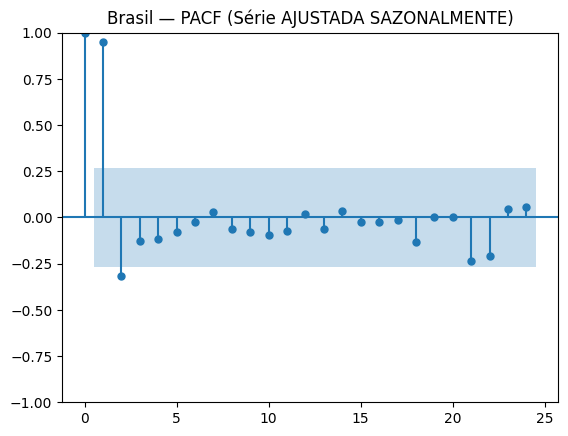

In [71]:
# Comparação ACF/PACF — Série original vs. Ajustada sazonalmente (Brasil)
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

dfB = globals().get("df_brasil")
if dfB is None:
    raise NameError("Não encontrei df_brasil")

dfB = dfB.copy().sort_values("data")
dfB["data"]  = pd.to_datetime(dfB["data"], errors="coerce")
dfB["valor"] = pd.to_numeric(dfB["valor"], errors="coerce")

# Série ORIGINAL
s_orig = dfB["valor"].dropna()
lags_o = min(24, max(2, len(s_orig) - 2))

plt.figure()
plot_acf(s_orig, lags=lags_o, title="Brasil — ACF (Série ORIGINAL)")
plt.show()

plt.figure()
plot_pacf(s_orig, lags=lags_o, method="ywm", title="Brasil — PACF (Série ORIGINAL)")
plt.show()

# Série AJUSTADA SAZONALMENTE

s_adj = dfB["valor_aj_sazonal"].dropna()
lags_a = min(24, max(2, len(s_adj) - 2))

plt.figure()
plot_acf(s_adj, lags=lags_a, title="Brasil — ACF (Série AJUSTADA SAZONALMENTE)")
plt.show()

plt.figure()
plot_pacf(s_adj, lags=lags_a, method="ywm", title="Brasil — PACF (Série AJUSTADA SAZONALMENTE)")
plt.show()


# **Cronograma**




Etapa 1 — 29/08 (concluída)

Etapa 3 — 31/10

| Data        | Atividade              | Descrição                                                      | Entregável                    |
| ----------- | ---------------------- | -------------------------------------------------------------- | ----------------------------- |
| 27/09–04/10 | Definição das técnicas | Critérios e modelos candidatos (ARIMA/SARIMA; alternativas)    | Plano de modelagem            |
| 07–18/10    | Implementação          | Treino/validação, seleção de hiperparâmetros                   | Código + notebooks            |
| 21–25/10    | Avaliação              | Métricas (ex.: RMSE/MAE), validação temporal, análise de erros | Tabelas/figuras de desempenho |
| 28–30/10    | Comparação e escolha   | Comparação entre modelos, justificativa do melhor              | Relato comparativo            |
| 31/10   | Entrega Etapa 3    | Resultados de modelagem e análise crítica                      | Notebook + relatório parcial  |


Etapa 4 - 28/11

| Data      | Atividade              | Descrição                                       | Entregável                                 |
| --------- | ---------------------- | ----------------------------------------------- | ------------------------------------------ |
| 01–15/11  | Análise crítica        | Verificação de suposições, limitações, robustez | Notas técnicas                             |
| 18–22/11  | Produto e apresentação | Preparação de gráficos finais e *storyline*     | Slides + artefatos                         |
| 25–27/11  | Finalização            | Revisões, checagem de reprodutibilidade         | *Release* final                            |
| **28/11** | **Entrega Etapa 4**    | Resultado final + documentação                  | Relatório final, slides, notebooks e dados |




# **Referências**

BARROS, R.; CORSEUIL, C. Desemprego e dinâmica do mercado de trabalho no Brasil. Revista Brasileira de Economia, v. 75, n. 3, p. 321-345, 2021.

CARVALHO, M.; MOREIRA, P. Previsão da taxa de desocupação brasileira com modelos ARIMA. Economia Aplicada, v. 24, n. 2, p. 245-266, 2020.

FIRPO, S.; GONZAGA, G.; MONTEIRO, J. Crises econômicas e mercado de trabalho no Brasil. Estudos Econômicos, v. 52, n. 1, p. 5-30, 2022.

HARVEY, A. C. Forecasting, Structural Time Series Models and the Kalman Filter. Cambridge: Cambridge University Press, 1990.

HYNDMAN, R. J.; ATHANASOPOULOS, G. Forecasting: Principles and Practice. 2. ed. Melbourne: OTexts, 2018.

IBGE. Pesquisa Nacional por Amostra de Domicílios Contínua – Notas metodológicas. Rio de Janeiro, 2024.

ILO. World Employment and Social Outlook: Trends 2023. Genebra: International Labour Office, 2023.

NAÇÕES UNIDAS. ODS 8: Trabalho decente e crescimento econômico. 2023. Disponível em: https://brasil.un.org/pt-br/sdgs/8.

SANTOS, L.; PORSSE, A. Previsão do desemprego regional com aprendizado de máquina. Revista de Economia Aplicada, v. 26, n. 1, p. 89-112, 2022.

SILVA, J.; PORSSE, A. Modelos de espaço de estado para séries de desemprego. Estudos Econômicos, v. 51, n. 4, p. 753-780, 2021.


In [ ]:
#@title **Avaliação**
Referencial_teorico = 10 #@param {type:"slider", min:0, max:10, step:1}

Pipeline_solucao = 10 #@param {type:"slider", min:0, max:10, step:1}

Cronograma = 10 #@param {type:"slider", min:0, max:10, step:1}

In [ ]:
#@title **Nota Final**
nota = 0.45*Referencial_teorico + 0.45*Pipeline_solucao + 0.10*Cronograma

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_nome.append(lista[0]);")

alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 10.0



,nome,nota
0,Aluno 1,10.0
1,Aluno 2,10.0
2,Aluno 3,10.0
3,Aluno 4,10.0
4,Aluno 5,10.0
